# 12. Serial Correlation and Heteroskedasticity in a Time Series

## 12.1. Testing for Serial Correlation of the Error Term

### Example 12.2.: Testing for AR(1) Serial Correlation

#### Breusch-Godrey (Langrangian Multiplier) Test

In [1]:
import wooldridge as woo
import datetime
import numpy as np 
import pandas as pd
import pandas_datareader as pdr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from supplementaryFunctions import *

In [2]:
phillips = woo.dataWoo("phillips")
periods = len(phillips.index)

# define yearly time series index
pd.to_datetime(phillips["year"])
phillips.set_index("year", inplace = True)
yt96 = phillips.index <= 1996
formula = "Q('inf') ~ unem"
reg_s = smf.ols(formula = formula,
               data = phillips,
               subset = yt96)
results_s = reg_s.fit()

# residuals and AR(1) test:
phillips["resid_s"] = results_s.resid
phillips["resid_s_lag1"] = phillips["resid_s"].shift() 
formula = "resid_s ~ resid_s_lag1"
reg = smf.ols(formula = formula,
             data = phillips,
             subset = yt96)
results = reg.fit()
OLS_summary(results_s)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0527$$,,,,
Intercept,1.4236,0.8282,0.4118,1.7190
unem,0.4676,1.6174,0.1125,0.2891


#### The error term from the regression is auto correlated

In [3]:
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.346$$,,,,
Intercept,-0.1134,-0.3155,0.7538,0.3594
resid_s_lag1,0.5730,4.9337,0.0000,0.1161


In [4]:
formula = "Q('inf').diff() ~ unem"
reg_s = smf.ols(formula = formula,
               data = phillips,
               subset = yt96)
results_s = reg_s.fit()

# residuals and AR(1) test:
phillips["resid_s"] = results_s.resid
phillips["resid_s_lag1"] = phillips["resid_s"].shift() 
formula = "resid_s ~ resid_s_lag1"
reg = smf.ols(formula = formula,
             data = phillips,
             subset = yt96)
results = reg.fit()
OLS_summary(results_s)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.1078$$,,,,
Intercept,3.0306,2.2012,0.0328,1.3768
unem,-0.5426,-2.3575,0.0227,0.2302


In [5]:
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0018$$,,,,
Intercept,0.1942,0.6464,0.5213,0.3004
resid_s_lag1,-0.0356,-0.2873,0.7752,0.1239


#### We could test change test the relationship between the change in inflation and the change in unemployment. To do this, we simply pass _phillips.diff()_. This is more sensible than regressing the change in inflation on the rate of unemployment. The expectations augmented Phillips Curve

In [6]:
formula = "Q('inf') ~ unem"
reg_s = smf.ols(formula = formula,
               data = phillips.diff(),
               subset = yt96)
results_s = reg_s.fit()

# residuals and AR(1) test:
phillips["resid_s"] = results_s.resid
phillips["resid_s_lag1"] = phillips["resid_s"].shift() 
formula = "resid_s ~ resid_s_lag1"
reg = smf.ols(formula = formula,
             data = phillips,
             subset = yt96)
results = reg.fit()
OLS_summary(results_s)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.135$$,,,,
Intercept,-0.0782,-0.2244,0.8235,0.3485
unem,-0.8422,-2.6799,0.0102,0.3143


In [7]:
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.001$$,,,,
Intercept,0.1585,0.5020,0.6181,0.3158
resid_s_lag1,-0.0284,-0.2143,0.8313,0.1323


### The relationship detected is negative and the p-value of -.0111 suggests that the relationship is significant.


#### Our final regression tests changes in unemployment regressed in changes in inflation with an inflation lag term/ The result suggests that changes in unemployment associated with inflation tend to be self-reversing. This is probably the most realistic model. The p-values are less than 10%, which isn't great, but the result is consistent with a theory of expectations that presumes inflation expectations tend to match the true rate of inflation in the long-run.

In [8]:
# probably most accurate model

formula = "unem ~ Q('inf') + Q('inf').shift() + 0"
reg_s = smf.ols(formula = formula,
               data = phillips.diff(),
               subset = yt96)
results_s = reg_s.fit()

# residuals and AR(1) test:
phillips["resid_s"] = results_s.resid
phillips["resid_s_lag1"] = phillips["resid_s"].shift() 
formula = "resid_s ~ resid_s_lag1"
reg = smf.ols(formula = formula,
             data = phillips,
             subset = yt96)
results = reg.fit()
OLS_summary(results_s)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.1351$$,,,,
Q('inf'),-0.1338,-1.9538,0.0570,0.0685
Q('inf').shift(),0.1027,1.7659,0.0842,0.0582


#### No autocorrelation in the error term

In [9]:
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0016$$,,,,
Intercept,-0.0011,-0.0073,0.9942,0.1519
resid_s_lag1,-0.0402,-0.2682,0.7898,0.1500


### Example 12.4: Testing for AR(3) Serial Correlation

In [10]:
# rerun regression from end of Chapter 10, but without month controls
barium = woo.dataWoo("barium")
periods = len(barium)
formula = "np.log(chnimp) ~ np.log(chempi) + np.log(gas) + np.log(rtwex) + befile6 + affile6 + afdec6"
reg = smf.ols(formula = formula,
             data = barium)
results = reg.fit()
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.3049$$,,,,
Intercept,-17.8028,-0.8459,0.3992,21.0454
np.log(chempi),3.1172,6.5050,0.0000,0.4792
np.log(gas),0.1963,0.2166,0.8289,0.9066
np.log(rtwex),0.9830,2.4566,0.0154,0.4002
befile6,0.0596,0.2283,0.8198,0.2610
affile6,-0.0324,-0.1226,0.9026,0.2643
afdec6,-0.5652,-1.9775,0.0502,0.2858


In [11]:
bg_results = {"Auto":{},
             "Manual":{}}
num_lags = 3
auto_test = sm.stats.diagnostic.acorr_breusch_godfrey(results, nlags = num_lags)
bg_results["Auto"]["F-stat"] = auto_test[2]
bg_results["Auto"]["p-val"] = auto_test[3]

barium["resid"] = results.resid
for lag in range(1,num_lags+1):
    barium["resid_lag" + str(lag)] = barium["resid"].shift(lag)

manual_formula = "resid ~ resid_lag1 + resid_lag2 + resid_lag3 +"
manual_formula = manual_formula + formula[16:]
manual_reg = smf.ols(formula = manual_formula,
             data = barium)
manual_results = manual_reg.fit()
hypotheses = ["resid_lag1 = 0", "resid_lag2 = 0", "resid_lag3 = 0"]
manual_test = manual_results.f_test(hypotheses)
bg_results["Manual"]["F-stat"] = manual_test.statistic
bg_results["Manual"]["p-val"] = manual_test.pvalue
pd.DataFrame(bg_results)

,Auto,Manual
F-stat,5.124662,5.122907
p-val,0.002264,0.002290


#### We can run caculate Durbin Watson statistics for the regressions we ran earlier.

In [12]:
# more accurate model
dw_results = {}
formula = "unem ~ Q('inf') + Q('inf').shift()"
# dw_results[formula] = {}
reg_s = smf.ols(formula = formula,
               data = phillips.diff(),
               subset = yt96)
results_s = reg_s.fit()
dw_results[formula] = sm.stats.stattools.durbin_watson(results_s.resid)
dw_results

{"unem ~ Q('inf') + Q('inf').shift()": 2.0701510145319744}

### A Durbin Watson statistic of 2.06 is very close to 2. This indicates that there is essentialy no autocorrelation in the error term. The residual term cannot be explained by the explanatory variables or the lags of the error term.

In [13]:
barium = woo.dataWoo("barium")
periods = len(barium.index)
barium.index = pd.date_range(start = "1972-02", 
                             periods = periods, 
                             freq = "M")
names = ["chnimp", "chempi", "gas", "rtwex", "befile6", "affile6", "afdec6"]
log_vars = names[:4]
X, y = build_X_y_matrices(barium, names, log_vars = log_vars)
reg = sm.GLSAR(y, X)
CORC_results = reg.iterative_fit(maxiter=100)
OLS_summary(CORC_results)

C:\Users\JLCat\GithubRepositories\Learn-Python-for-Stats-and-Econ\Wooldridge -- Heiss and Brunner\supplementaryFunctions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Intercept"] = 1


,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.1914$$,,,,
chempi,2.9454,4.5476,0.0000,0.6477
gas,1.0633,1.0724,0.2857,0.9916
rtwex,1.1384,2.2109,0.0289,0.5149
befile6,-0.0173,-0.0539,0.9571,0.3214
affile6,-0.0331,-0.1022,0.9187,0.3238
afdec6,-0.5773,-1.6779,0.0959,0.3441
Intercept,-37.5130,-1.6142,0.1090,23.2390


## 12.3. Serial Correlation-Robust Inference with OLS

#### Newey West Standard Errors

In [14]:
prminwge = woo.dataWoo("prminwge")
prminwge["time"] = prminwge["year"].sub(1949)
pd.to_datetime(prminwge["year"])
prminwge.set_index(prminwge["year"], inplace = True)
names = ["prepop","mincov", "prgnp", "usgnp", "time"]
log_vars = names[:-1]
X, y = build_X_y_matrices(prminwge, names, log_vars = log_vars)
# OLS regression
reg = sm.OLS(y, X)
results = reg.fit()
OLS_summary(results)

C:\Users\JLCat\GithubRepositories\Learn-Python-for-Stats-and-Econ\Wooldridge -- Heiss and Brunner\supplementaryFunctions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Intercept"] = 1


,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.8892$$,,,,
mincov,-0.2123,-5.2864,0.0000,0.0402
prgnp,0.2852,3.5437,0.0012,0.0805
usgnp,0.4860,2.1896,0.0357,0.2220
time,-0.0267,-5.7629,0.0000,0.0046
Intercept,-6.6634,-5.2976,0.0000,1.2578


In [15]:
hac_results = reg.fit(cov_type="HAC", cov_kwds={"maxlags":2})
OLS_summary(hac_results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.8892$$,,,,
mincov,-0.2123,-4.9821,0.0000,0.0426
prgnp,0.2852,3.0720,0.0021,0.0928
usgnp,0.4860,1.8687,0.0617,0.2601
time,-0.0267,-4.9710,0.0000,0.0054
Intercept,-6.6634,-4.6539,0.0000,1.4318


## 12.4. Autoregressive Conditional Heteroskedasticity

$$y_t = \beta_0 + \beta_1x_{t1} + \beta_2x_{t2} + ... + \beta_kx_{tk} + u_t$$

The error term $u$ follows an ARCH process if:
    
$$E(u_t^2|u_{t-1}, u_{t-2}, ...) = \alpha_0 + \alpha_1u_{t-1}^2$$

### Example 12.9: ARCH in Stock Returns

In [16]:
nyse = woo.dataWoo("nyse")
nyse["ret"] = nyse["return"]
nyse["ret_lag1"] = nyse["ret"].shift()
nyse["time"] = np.arange(nyse.shape[0])
formula="ret ~ ret_lag1"
reg = smf.ols(formula = formula,
             data = nyse)
results = reg.fit()

nyse["resid_sq"] = results.resid **2
nyse["resid_sq_lag1"] = nyse["resid_sq"].shift()

# model for squared residuals
formula = "resid_sq ~ resid_sq_lag1"
ARCHreg = smf.ols(formula = formula,
                 data = nyse)
results_ARCH = ARCHreg.fit()
OLS_summary(results_ARCH)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.1136$$,,,,
Intercept,2.9474,6.6951,0.0,0.4402
resid_sq_lag1,0.3371,9.3767,0.0,0.0359


<AxesSubplot:xlabel='time', ylabel='resid_sq'>

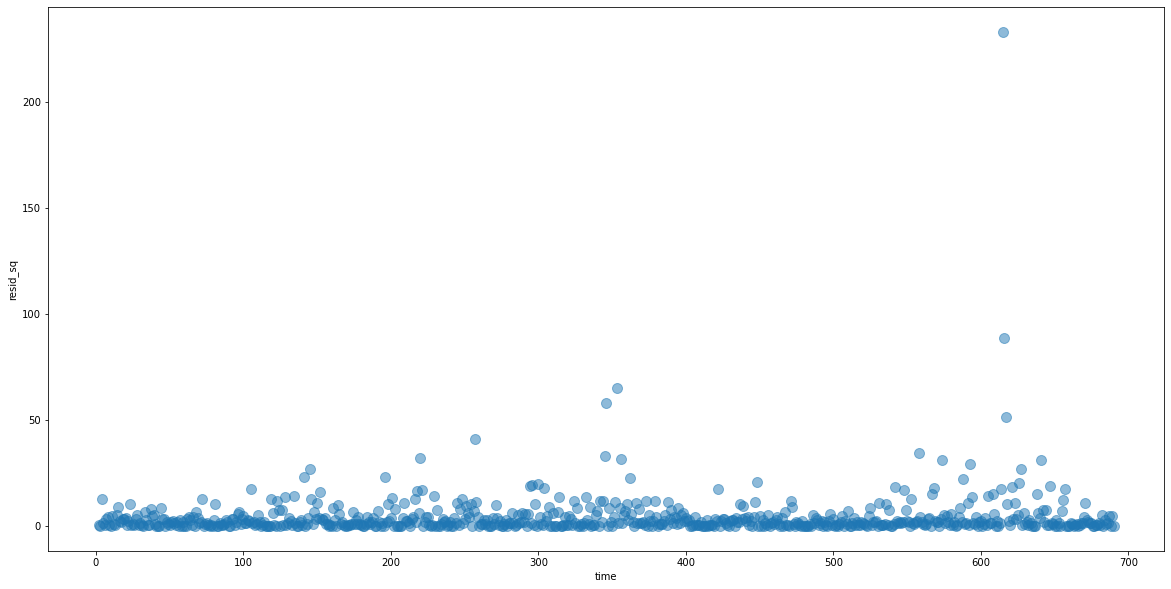

In [17]:
fig, ax = plt.subplots(figsize = (20,10))
nyse.plot.scatter(x = "time", y = "resid_sq", ax = ax, alpha = .5, s =100)

In [18]:
tickers = ["AAPL"]
start = datetime.datetime(2007,12,13)
end = datetime.datetime(2016,12,31)

data = pdr.data.DataReader(tickers, "yahoo", start, end)
ret = np.log(data).diff()["Adj Close"]
ret["ret"] = ret["AAPL"]
ret["ret_lag1"] = ret["ret"].shift(1)
ret["time"] = np.arange(len(ret))
# AR(1)
formula = "ret ~ ret_lag1"
reg = smf.ols(formula = formula,
            data = ret)
results = reg.fit()

ret["resid_sq"] = results.resid ** 2
ret["resid_sq_lag1"] = ret["resid_sq"].shift()
formula = "resid_sq ~ resid_sq_lag1"
ARCH_reg = smf.ols(formula = formula,
                  data = ret)
ARCH_results = ARCH_reg.fit()
OLS_summary(ARCH_results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.03$$,,,,
Intercept,0.0003,12.1743,0.0,0.0000
resid_sq_lag1,0.1732,8.3868,0.0,0.0207


<AxesSubplot:xlabel='time', ylabel='resid_sq'>

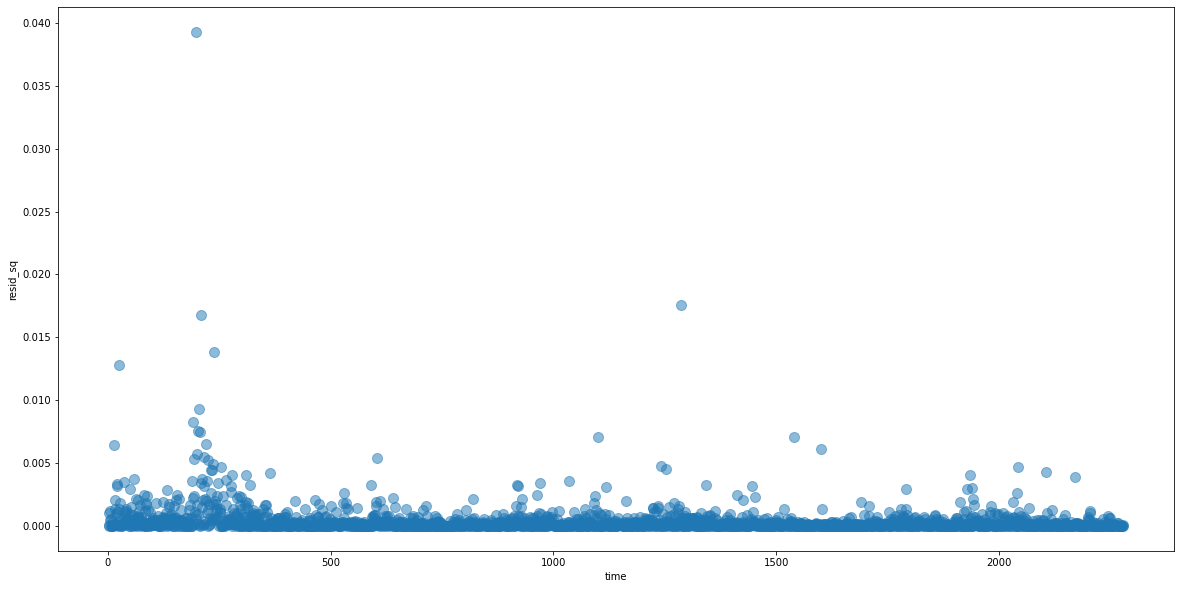

In [19]:
fig, ax = plt.subplots(figsize = (20,10))
ret.plot.scatter(x = "time", y = "resid_sq", ax = ax, alpha = .5, s =100)